# Data Processing in Python project

### Authors: Edgar Robles Diaz, Mirko Forgetta

The purpose of the following project is to get some information from the web site https://uptownspirits.com/. It is an online shop selling alcohol items.

The Notebook is arranged as following:

  * Scraping (of the web-page);
  * Cleaning (of the dataset);
  * Information and plots (from the dataset).

## Scraping 

First it will import the required libraries in order to scrape the data succesfully.

In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup, SoupStrainer
from urllib.request import urlopen, Request
import json
import os

Firstly, we need the complete set of links in an object for further parsing.

In [4]:
print(requests.get("https://www.uptownspirits.com/robots.txt").text)

User-agent: *
Disallow: /wp-admin/
Allow: /wp-admin/admin-ajax.php



Firstly, we need the complete set of links in an object for further parsing.

In [5]:
def GetSoup(link):
        r = requests.get(link)
        r.encoding = 'UTF-8'
        return BeautifulSoup(r.text,'lxml')
    

In [6]:
def GetLinks(link):                     
    soup = GetSoup(link)
    l = []
    for link in soup.findAll('a', attrs={"class":"product-images"}):
        l.append(link.get('href'))
    return l

In [7]:
linqs = []

for i in range(1,9):
    linqs.append("https://uptownspirits.com/shop/liquor/page/" + str(i) + "/?product_count=144")

In [8]:
products =[]

for link in linqs:
    products.append(GetLinks(link))

prods = [item for sublist in products for item in sublist]

Afterwards, we must build a function that allows us to convert an html from the website to a BeautifulSoup object (BSO).

In [9]:
class Scraper:
    
    def __init__(self):
        self.dataall = {}
        
    def GetSoup(self, url):
        r = requests.get(url)
        r.encoding = 'UTF-8'
        self.soup  = BeautifulSoup(r.text,'lxml')
        
    def ParseSKU(self):
        el = self.soup.find('span', attrs={'class':'sku'})
        self.SKU = el.text if el else "NA"
    
    def ParseName(self):
        self.title = self.soup.find('h1', attrs={'class':'product_title entry-title'}).text

    def ParsePrice(self):
        el = self.soup.find('p', attrs={'class':'price'})
        self.price = el.text if len(el.text) >= 8 else el.text + " " + el.text
    
    def ParseBrand(self):
        el = self.soup.find('tr', attrs={'class':'woocommerce-product-attributes-item woocommerce-product-attributes-item--attribute_pa_brand'})
        ele = el.text if el else "NA"
        self.brand = ele.replace("Brand","")
    
    def ParseAvailability(self):
        el = self.soup.find('div', attrs={'class':'avada-availability'})
        self.availability = el.text if el else "NA"
         
    def Region(self):
        el = self.soup.find('tr', attrs={'class':'woocommerce-product-attributes-item woocommerce-product-attributes-item--attribute_pa_region'})
        ele = el.text if el else "NA"
        self.region = ele.replace("Region","")
    
    def ParseWeight(self):
        el = self.soup.find('tr', attrs={'class':'woocommerce-product-attributes-item woocommerce-product-attributes-item--weight'})
        ele = el.text if el else "NA"
        self.weight = ele.replace('Weight', '')
        
    def ParseAlcType(self):
        el = self.soup.find('tr', attrs={'class':'woocommerce-product-attributes-item woocommerce-product-attributes-item--attribute_pa_alcohol-type'})
        ele = el.text if el else "NA"
        self.alctype = ele.replace('Alcohol Type', "")
    
    def Clas(self):
        el = self.soup.find('tr', attrs={'class':"woocommerce-product-attributes-item woocommerce-product-attributes-item--attribute_pa_class"})
        ele = el.text if el else "NA"
        self.clas = ele.replace("Class","")
    
    def Proof(self):
        el = self.soup.find('tr', attrs={'class':'woocommerce-product-attributes-item woocommerce-product-attributes-item--attribute_pa_proof'})
        ele = el.text if el else "NA"
        self.proof = ele.replace('Proof','')
        
    def oneDic(self):
        '''
        a dictionary of data for one link
        '''
        self.dic = {}
        
        self.dic['SKU'] = self.SKU
        self.dic['Name'] = self.title
        self.dic['Price'] = self.price
        self.dic['Brand'] = self.brand
        self.dic['Availability'] = self.availability
        self.dic['Region'] = self.region
        self.dic['Weight'] = self.weight
        self.dic['Type'] = self.alctype
        self.dic['Class'] = self.clas
        self.dic['Proof'] = self.proof
        
        #append it to all dataframe
        self.dataall[self.title] = self.dic

In [10]:
ws = Scraper()

Next step will need some minutes. If you don't want wait for it, you can go ahead using the .csv file bellow.

In [11]:
for link in prods:
    ws.GetSoup(link)
    ws.ParseSKU()
    ws.ParseName()
    ws.ParsePrice()
    ws.ParseBrand()
    ws.ParseAvailability()
    ws.Region()
    ws.ParseWeight()
    ws.ParseAlcType()
    ws.Clas()
    ws.Proof()
    ws.oneDic()

In [12]:
df = pd.DataFrame.from_dict(ws.dataall).transpose()
df

,Availability,Brand,Class,Name,Price,Proof,Region,SKU,Type,Weight
Skrewball Peanut Butter Whiskey 750ml,In stock,Skrewball,Peanut Butter Whiskey,Skrewball Peanut Butter Whiskey 750ml,$24.95 $24.95,70,America,860265002405,Whiskey,3.5 lbs
E.H. Taylor Small Batch Bourbon Whiskey 750ml,In stock,E.H. Taylor,Bourbon Whiskey,E.H. Taylor Small Batch Bourbon Whiskey 750ml,$49.95 $43.95,100,America,088004005498,Whiskey,3.5 lbs
Eagle Rare Bourbon Whiskey 750ml,In stock,"Buffalo Trace, Eagle Rare",Bourbon Whiskey,Eagle Rare Bourbon Whiskey 750ml,$33.95 $33.95,100,America,088004021344,Whiskey,3.5 lbs
Pennsylvania Dutch Egg Nog 750ml,Out of stock,Pennsylvania Dutch,NA,Pennsylvania Dutch Egg Nog 750ml,$9.95 $9.95,29.5,NA,084380360947,Liqueur,3.5 lbs
Buffalo Trace Bourbon Whiskey 750ml,In stock,Buffalo Trace,NA,Buffalo Trace Bourbon Whiskey 750ml,$24.95 $24.95,NA,NA,080244009236,Whiskey,3.5 lbs
Willett Family Estate Bottled 4 Year Rye 750ml,Out of stock,Willett,American Whiskey,Willett Family Estate Bottled 4 Year Rye 750ml,$59.95 $59.95,106.2,America,NA,Rye,3.5 lbs
Empress 1908 Gin 750ml,In stock,Empress 1908,NA,Empress 1908 Gin 750ml,$29.95 $26.95,85,Canada,628451773108,Gin,3.5 lbs
Blanton’s Single Barrel Bourbon 750ml,Out of stock,NA,NA,Blanton’s Single Barrel Bourbon 750ml,$139.95 $139.95,NA,America,NA,NA,3.5 lbs
Sazerac Rye Whiskey 750ml,In stock,Sazerac,Rye Whiskey,Sazerac Rye Whiskey 750ml,$27.95 $27.95,90,America,088004139940,Whiskey,3.5 lbs
Tequila Clase Azul Reposado 750ml,In stock,Clase Azul,Reposado,Tequila Clase Azul Reposado 750ml,$84.95 $84.95,80,Mexico,081240049516,Tequila,7 lbs


In [13]:
#export in .csv
export = df.to_csv("webscrape.csv")

## Cleaning 
In the data frame, there some issues to fix. For example in the Price's coloumn there are two numbers. Those will be splitted in two different variables:"Previous_price" and "Discount_price"). 
We will transform variables as float, delete useless variables, delete missing values and create two more variables: "Price_diff" and "Discount". 
The final dataset will be exported as csv file: "clean_webscrape.csv".

In [2]:
data = pd.read_csv("webscrape.csv")

In [3]:
#delete extra column at the beginning (name is already defined as a column variable)
del data["Unnamed: 0"]

Splitting prices into two columns (previous and discount).

In [4]:
new = data['Price'].str.split(" ", n = 1, expand = True)
data['Previous_price'] = new[0]
data['Discount_price'] = new[1]
data.drop(columns = ['Price'], inplace = True)

Transform prices into float, create diff column to look at the difference between previous and discounted prices.

In [5]:
data['Previous_price'] = data['Previous_price'].str.replace(',', '')
data['Previous_price'] = data['Previous_price'].str.replace('$', '')
data['Previous_price'] = data['Previous_price'].astype(float)

In [6]:
data['Discount_price'] = data['Discount_price'].str.replace(',', '')
data['Discount_price'] = data['Discount_price'].str.replace('$', '')
data['Discount_price'] = data['Discount_price'].astype(float)

In [7]:
data["Price_diff"] = data['Previous_price'] - data['Discount_price']

Create another varible ("discount percentage") in order to quantify how much was discounted in terms of the price of the bottle.

In [8]:
data["Discount"] = data['Price_diff']/data['Previous_price']

We also want the proof variable to be as float, nevertheless, there are some string outliers with tags "Varies" and "72 proof".

In [9]:
data[data.Proof == 'Varies']

,Availability,Brand,Class,Name,Proof,Region,SKU,Type,Weight,Previous_price,Discount_price,Price_diff,Discount
122,In stock,Smooth Ambler,NaN,Smooth Ambler Old Scout Single Barrel Select B...,Varies,America,854570002366,Whiskey,3.5 lbs,74.95,74.95,0.0,0.0
613,Only 1 left in stock,Michter's,NaN,Michter’s Barrel Strength Rye Whiskey 2019,Varies,America,039383006518,NaN,3.5 lbs,169.95,169.95,0.0,0.0


Transform Proof into float.

In [10]:
data['Proof'] = data.Proof[data.Proof != '72 proof']

In [11]:
data['Proof'] = data.Proof[data.Proof != 'Varies']

Convert the Proof variable to numeric.

In [12]:
data['Proof']=data['Proof'].astype(float)

Delete irrelevant variables, SKU (although useful for ID, has a lot of NA values) and Class (only useful for Whisky).

In [13]:
del data['SKU']
del data['Class']

Drop NA values (observations lacking infromation such as Brand, Proof, Type and Region).

In [14]:
clean_data = data.dropna(axis=0, how='any')

In [15]:
export = clean_data.to_csv("clean_webscrape.csv")

## Information and plots

In [16]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

Statistic description of numeric variables

In [17]:
clean_data.describe()

,Proof,Previous_price,Discount_price,Price_diff,Discount
count,717.000000,717.000000,717.000000,717.000000,717.000000
mean,87.155816,109.791827,108.891841,0.899986,0.008711
std,16.579795,157.219826,155.392886,7.282204,0.049438
min,30.000000,2.950000,2.950000,0.000000,0.000000
25%,80.000000,36.950000,36.950000,0.000000,0.000000
50%,86.000000,59.950000,59.950000,0.000000,0.000000
75%,95.000000,119.950000,119.950000,0.000000,0.000000
max,151.000000,1499.950000,1399.950000,119.950000,0.620621


There is a product that got a 62% discount...

In [18]:
clean_data[clean_data.Discount == max(clean_data.Discount)]  #### YAcht Club Vodka is a bang for your buck. ####

,Availability,Brand,Name,Proof,Region,Type,Weight,Previous_price,Discount_price,Price_diff,Discount
869,In stock,Yacht Club,Yacht Club Vodka 750ml,80.0,France,Vodka,3.5 lbs,49.95,18.95,31.0,0.620621


Box plot of fonal prices (discounted), it seems there are several outliers (rare spirits).

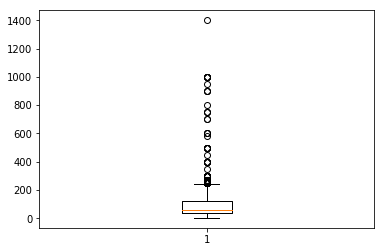

In [19]:
plt.boxplot(clean_data['Discount_price'])
plt.show()

Once we filter out the outliers.

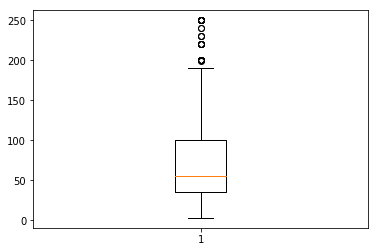

In [20]:
price = clean_data['Discount_price']
wo_out = price[price < 250]

plt.boxplot(wo_out)
plt.xlabel = ('Price')
plt.show()

Number of bottles grouped by type of alcohol. Uptownspitis client base prefers Whisky, Tequila and Scotch.

In [21]:
clean_data[['Name','Type']].groupby('Type').count()

,Name
Type,
Absinthe,1
Bitters,7
Bourbon,3
Brandy,10
Cognac,15
"Cognac, Liqueur",1
Gin,20
"Gin, Liqueur",3
Liqueur,27


...and here it is the chart associated to the previous table.

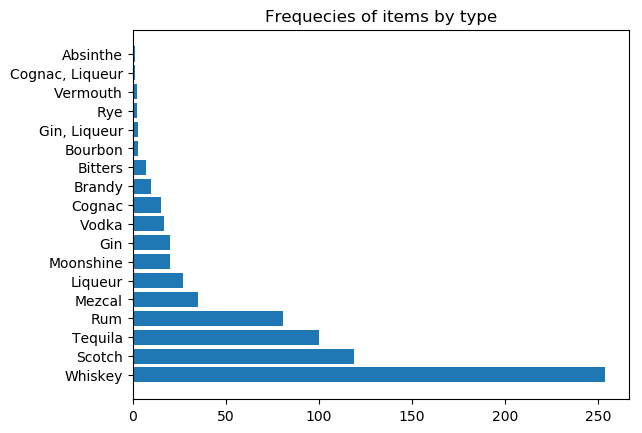

In [22]:
COUNT=clean_data.Type.value_counts(dropna=False)
df1=pd.DataFrame(COUNT)

plt.rcdefaults()
fig, ax = plt.subplots()

x = np.arange(len(df1))
ax.set_yticks(x)
ax.set_yticklabels(df1.index)
ax.barh(x,COUNT)
ax.set_title('Frequecies of items by type')

plt.show()

Group bottles according to availability, there are several bottles out-of-stock.

In [23]:
clean_data[['Name', 'Availability']].groupby('Availability').count()

,Name
Availability,
In stock,505
Only 1 left in stock,38
Only 2 left in stock,36
Only 3 left in stock,47
Out of stock,91


Group data to every region's type of liquor.

In [24]:
groupby_type_region = clean_data.groupby(['Type', 'Region'])
groupby_type_region['Availability'].count()  

Type             Region         
Absinthe         America              1
Bitters          Australia            7
Bourbon          Illinois             1
                 Indiana              1
                 Taiwan               1
Brandy           America              4
                 Bolivia              1
                 Italy                1
                 Spain                3
                 United States        1
Cognac           France              15
Cognac, Liqueur  France               1
Gin              America             10
                 Canada               1
                 England              1
                 Germany              2
                 Japan                1
                 London               2
                 Scotland             1
                 Spain                2
Gin, Liqueur     Scotland             3
Liqueur          America             10
                 England              1
                 France               5
       

The three main regions that produce alcoholic liquors are US, MExico and Scotland, this makes sense with its main products, Tequila, Whisky and Scotch.

In [25]:
clean_data[["Type", "Region","Name"]].groupby(["Type", "Region"]).count()

Name
Type            Region               
Absinthe        America             1
Bitters         Australia           7
Bourbon         Illinois            1
                Indiana             1
                Taiwan              1
Brandy          America             4
                Bolivia             1
                Italy               1
                Spain               3
                United States       1
Cognac          France             15
Cognac, Liqueur France              1
Gin             America            10
                Canada              1
                England             1
                Germany             2
                Japan               1
                London              2
                Scotland            1
                Spain               2
Gin, Liqueur    Scotland            3
Liqueur         America            10
                England             1
                France              5
                Ireland             1
                Italy               3
                Mexico              1
                Scotland            1
                Switzerland         5
Mezcal          America             2
...                               ...
Rum             United States       5
                Venezuela           3
Rye             America             2
Scotch          America             5
                Scotland          113
                Speyside            1
Tequila         America             1
                Mexico             99
Vermouth        Italy               2
Vodka           America             7
                Finland             1
                France              3
                Japan               1
                Russia              1
                Slovak Republic     1
                Sweden              3
Whiskey         America           142
                Australia           1
                Canada              2
                England             1
                Illinois            2
                India               1
                Ireland            37
                Japan              27
                Kentucky            1
                Mexico              2
                New Zealand         2
                Scotland           27
                Taiwan              6
                United States       3

[86 rows x 1 columns]

Histogram (Distribution) of proof.

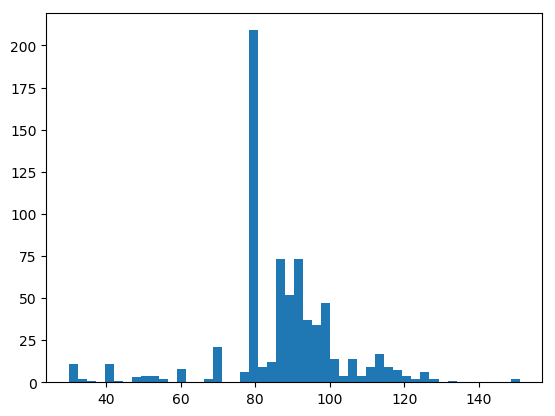

In [26]:
plt.hist(clean_data['Proof'], bins = 50)
plt.show()
#It seems that most liquors converge to an 80 proof (Regulations?)
#Nonehteless, there are several outliers in both tails

Filter the liquors with the most proof level.

In [27]:
clean_data[clean_data.Proof >= 120]
#Guyana Rum (Lemon Hart) seems to be the bottle with the most proof level.

,Availability,Brand,Name,Proof,Region,Type,Weight,Previous_price,Discount_price,Price_diff,Discount
59,Only 1 left in stock,Knob Creek,Knob Creek Single Barrel Bourbon Whiskey 750ml,120.0,America,Whiskey,3.5 lbs,51.95,51.95,0.0,0.0
65,Out of stock,"Buffalo Trace, Stagg",Stagg Jr Bourbon Whiskey 750ml,126.0,America,Whiskey,3.5 lbs,79.95,79.95,0.0,0.0
153,Out of stock,Garrison Brothers,Garrison Brothers Cowboy Bourbon Whiskey 750ml,133.9,America,Whiskey,3.5 lbs,239.95,239.95,0.0,0.0
166,Out of stock,Chichibu,Chichibu Ichiro’s Cask #646 Single Malt Whiskey,121.2,Japan,Whiskey,3.5 lbs,799.95,799.95,0.0,0.0
243,Only 3 left in stock,1792,1792 Full Proof Bourbon Whiskey 750ml,125.0,America,Whiskey,3.5 lbs,49.95,49.95,0.0,0.0
331,Out of stock,Octomore,Octomore Edition 07.3 Whiskey 750ml,126.0,Scotland,Scotch,3.5 lbs,179.95,179.95,0.0,0.0
393,In stock,Lemon Hart & Son,Lemon Hart 151 750ml,151.0,Guyana,Rum,3.5 lbs,39.99,39.99,0.0,0.0
401,Only 1 left in stock,Willett,Willett Family Estate 5 Year Single Barrel Bou...,127.8,America,Whiskey,3.5 lbs,599.95,599.95,0.0,0.0
438,In stock,Young & Yonder Spirits,Fellows & Foragers Absinthe 750ml,120.0,America,Absinthe,3.5 lbs,44.95,44.95,0.0,0.0
465,In stock,Cutwater Spirits,Cutwater Spirits Three Sheets Cask Strength Ru...,128.0,United States,Rum,3.5 lbs,99.95,99.95,0.0,0.0


Look for the least alcoholic liquors.
Austin Cocktails are the ones with the lowest proof levels.

In [28]:
clean_data[clean_data.Proof == 30]

,Availability,Brand,Name,Proof,Region,Type,Weight,Previous_price,Discount_price,Price_diff,Discount
220,In stock,Blue Chair Bay,Blue Chair Bay Rum Banana Cream Rum,30.0,Caribbean,Rum,3.5 lbs,16.95,16.95,0.0,0.0
320,In stock,Brinley Gold Shipwreck,Brinley Gold Shipwreck Coconut Cream 750ml,30.0,Saint Kitts,Rum,3.5 lbs,27.95,27.95,0.0,0.0
608,In stock,Austin Cocktails,Austin Cocktails Cucumber Vodka Mojito,30.0,America,Vodka,3.5 lbs,18.95,18.95,0.0,0.0
609,In stock,Austin Cocktails,Austin Cocktails Perfect Bergamot Orange Marga...,30.0,America,Tequila,3.5 lbs,18.95,18.95,0.0,0.0
610,In stock,Austin Cocktails,Austin Cocktails Ruby Red Cocktail,30.0,America,Vodka,3.5 lbs,18.95,18.95,0.0,0.0
611,In stock,Austin Cocktails,Austin Cocktails Peppered Maple Blood Orange B...,30.0,America,Whiskey,3.5 lbs,18.95,18.95,0.0,0.0
612,In stock,Austin Cocktails,Austin Cocktails New School Gin Mule,30.0,America,Gin,3.5 lbs,18.95,18.95,0.0,0.0
742,In stock,Blue Chair Bay,Blue Chair Bay Key Lime Cream Rum,30.0,Caribbean,Rum,3.5 lbs,16.95,16.95,0.0,0.0


Relationship between Proof and Price by type (using the subset with only the 4 most frequent item's type).

In [29]:
SUB = clean_data.loc[(clean_data.Type == 'Whiskey') | (clean_data.Type == 'Scotch') | (clean_data.Type == 'Tequila') | (clean_data.Type == 'Rum')] 

In [30]:
typ=np.zeros(SUB.index.size)
k=0
for i in SUB.index:
   if clean_data["Type"][i]=="Whiskey":
    typ[k]=1
    k += 1
   elif clean_data["Type"][i]=="Scotch":
    typ[k]=2
    k += 1
   elif clean_data["Type"][i]=="Tequila":
    typ[k]=3
    k += 1
   else: k += 1

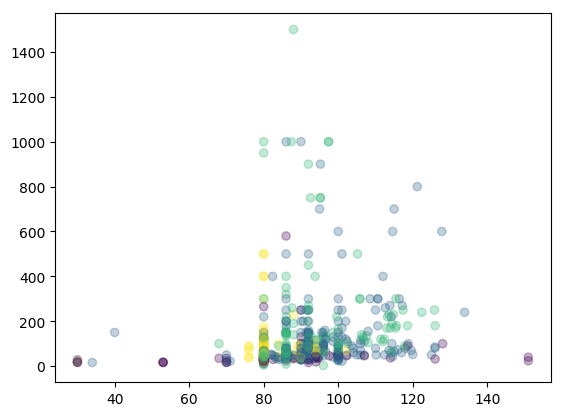

In [31]:
N = 100
r0 = 0.6
x = SUB["Proof"]
y = SUB["Previous_price"]
colors=typ
plt.scatter(x, y, c=typ,alpha=0.3)
plt.show()
#yellow=Whiskey #blue=Schotch #green=Tequila #violet=Rum

Tequila and Scotch have the highest variance in level of proof. The most expensive items belong to the same categories, but let's give a look more deeply to the prices. No clear relationship is shown.

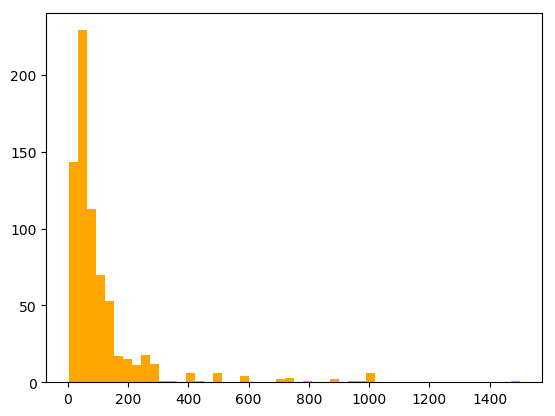

In [32]:
plt.hist(clean_data['Previous_price'], bins = 50,color="Orange")
plt.show()

Now, let's look at the most expensive bottles per region.

In [33]:
clean_data.groupby('Region')['Previous_price'].max()
#The most expensive bottle can be found Scotland

Region
America                999.95
Amsterdam               29.95
Australia               52.95
Bahamas                264.95
Barabados               69.95
Barbados                89.95
Belize                  37.95
Bolivia                 39.95
Canada                  49.95
Caribbean              119.95
Costa Rica              49.95
Dominican Republic      69.95
El Salvador             29.95
England                 57.95
Finland                 36.95
France                 969.95
Germany                 81.95
Guatemala               49.95
Guyana                  69.95
Haiti                   45.95
Hawaii                  39.99
Illinois                59.95
India                   67.95
Indiana                 69.95
Ireland                499.95
Italy                   49.95
Jamaica                579.95
Japan                  999.95
Kentucky                45.95
London                  54.95
Martinique              45.95
Mexico                 499.95
New Zealand             99.99
Nic

The most expensive bottle is from Scotland and it's a Scotch.

In [35]:
clean_data[clean_data.Previous_price == 1499.95]

,Availability,Brand,Name,Proof,Region,Type,Weight,Previous_price,Discount_price,Price_diff,Discount
915,Only 1 left in stock,Dalmore,Dalmore 25 Year Scotch Whiskey 750ml,88.0,Scotland,Scotch,3.5 lbs,1499.95,1399.95,100.0,0.066669


Filter the most expensive bottle in France, it's a Cognac.

In [36]:
clean_data[clean_data.Previous_price == 969.95]

,Availability,Brand,Name,Proof,Region,Type,Weight,Previous_price,Discount_price,Price_diff,Discount
656,Only 3 left in stock,Hine,Hine Triomphe 80 Decanter Cognac,80.0,France,Cognac,3.5 lbs,969.95,899.95,70.0,0.072169


Filter the most expensive bottles in Mexico: Clase Azul and Patron X Guillermo.

In [38]:
t=clean_data[clean_data.Previous_price == 499.95]
t[t.Region=="Mexico"]

,Availability,Brand,Name,Proof,Region,Type,Weight,Previous_price,Discount_price,Price_diff,Discount
187,In stock,Clase Azul,Tequila Clase Azul Añejo 750ml,80.0,Mexico,Tequila,3.5 lbs,499.95,499.95,0.0,0.0
898,Only 1 left in stock,Patron Tequila,Patron X Guillermo Del Toro Tequila 750ml,80.0,Mexico,Tequila,3.5 lbs,499.95,499.95,0.0,0.0


Grouping by limite availability (only one item left).

In [39]:
only_one = clean_data[clean_data.Availability == "Only 1 left in stock"]

In [40]:
only_one.describe()
#Not available bottles can be expensive, also they have no discount at all. 

,Proof,Previous_price,Discount_price,Price_diff,Discount
count,38.000000,38.000000,38.000000,38.000000,38.000000
mean,96.228947,389.706316,386.744737,2.961579,0.007035
std,10.922501,346.554836,338.505907,16.294549,0.034024
min,80.000000,51.950000,49.950000,0.000000,0.000000
25%,92.000000,112.490000,112.490000,0.000000,0.000000
50%,92.300000,259.950000,259.950000,0.000000,0.000000
75%,100.000000,559.950000,559.950000,0.000000,0.000000
max,127.800000,1499.950000,1399.950000,100.000000,0.200672


Filter whisky from the dataset and group it according to availability.

In [41]:
whisky_left = clean_data[clean_data.Type == 'Whiskey']

In [42]:
whisky_left.groupby('Availability')['Name'].count()

Availability
In stock                155
Only 1 left in stock     13
Only 2 left in stock     13
Only 3 left in stock     15
Out of stock             58
Name: Name, dtype: int64

Keep only the not available whisky.

In [43]:
out_of_whisky = whisky_left[clean_data.Availability == 'Out of stock']
out_of_whisky

C:\Users\39333\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Availability,Brand,Name,Proof,Region,Type,Weight,Previous_price,Discount_price,Price_diff,Discount
11,Out of stock,Woodford Reserve,Woodford Reserve 2019 20th Anniversary Kentuck...,90.40,America,Whiskey,3.5 lbs,54.95,54.95,0.00,0.0000
17,Out of stock,Willett,Willett Pot Still Reserve Small Batch Bourbon ...,94.00,America,Whiskey,3.5 lbs,49.95,49.95,0.00,0.0000
19,Out of stock,Weller,Weller Special Reserve Bourbon Whiskey 750ml,90.00,America,Whiskey,3.5 lbs,59.95,59.95,0.00,0.0000
21,Out of stock,Weller,Old Weller Antique 107 Bourbon Whiskey 750ml,107.00,America,Whiskey,3.5 lbs,109.95,109.95,0.00,0.0000
24,Out of stock,Angels Envy,Angels Envy Caribbean Rum Cask Finish Rye Whiskey,100.00,America,Whiskey,3.5 lbs,88.95,88.95,0.00,0.0000
28,Out of stock,Crown Royal,Crown Royal Peach Whiskey,70.00,Canada,Whiskey,3.5 lbs,49.95,49.95,0.00,0.0000
31,Out of stock,Rebel Yell,Rebel Yell 10 Year Single Barrel Bourbon Whiskey,100.00,America,Whiskey,3.5 lbs,69.95,69.95,0.00,0.0000
32,Out of stock,Hibiki,Hibiki Japanese Harmony Special Edition Whiskey,86.00,Japan,Whiskey,3.5 lbs,249.95,249.95,0.00,0.0000
36,Out of stock,High West,High West A Midwinter Nights Dram A6S6 750ml,98.60,America,Whiskey,3.5 lbs,129.95,129.95,0.00,0.0000
45,Out of stock,Old Ezra,Old Ezra 7 Year Bourbon Whiskey 750ml,117.00,America,Whiskey,3.5 lbs,59.95,59.95,0.00,0.0000


Group the whisky accordng to brand and look for the median price of them.

In [44]:
out_of_whisky.groupby('Brand')['Discount_price'].median()

Brand
1792                      64.95
Abraham Bowman            99.95
Angels Envy               88.95
Bird Dog                  39.95
Blood Oath               109.95
Bookers                   89.95
Buffalo Trace, Stagg      79.95
Buffalo Trace, Weller    249.95
Chichibu                 799.95
Compass Box              899.95
Cream Off Kentucky       199.95
Crown Royal               49.95
Dalwhinnie               109.95
E.H. Taylor               99.95
Four Roses               299.95
Garrison Brothers        239.95
Hibiki                   249.95
High West                129.95
Jack Daniels             129.95
Jameson                  339.95
Jim Beam                 199.95
Joseph Magnus            269.95
Kavalan                  259.95
Midleton                 259.95
Mitchers                 199.95
Nikka                    399.95
Old Ezra                  59.95
Old FItzgerald           299.95
Old Forester              21.95
Orphan Barrel            199.95
Paddy                     17.95
Pa

Cheapest, not available whisky..

In [45]:
out_of_whisky[out_of_whisky.Discount_price == out_of_whisky.Discount_price.min()]

,Availability,Brand,Name,Proof,Region,Type,Weight,Previous_price,Discount_price,Price_diff,Discount
440,Out of stock,Paddy,Paddy Bee Sting Irish Honey Whiskey 750ml,70.0,Ireland,Whiskey,3.5 lbs,17.95,17.95,0.0,0.0


Is it a bang for your buck?
Is it out of stock because of high demand or rather there is no recent supply for the product?
Reviews might prove useful in this case, further parsing.